In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
%cd "gdrive/MyDrive/Dati-TBDM/refined_data"

/content/gdrive/.shortcut-targets-by-id/1xGTanGyuk-TCLCMoGz5VNG7sUEscVC-Z/Dati-TBDM/refined_data


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
energy_fermate_merged = pd.read_csv("energy_fermate_merged.csv")

# Average the quality for any stop code

Calculate the average of good quality and scrap quality for any stop code

           Entries Count                     Description Stop_Code  Avg Good Quality  Avg Scrap Quality
STOP_CODE                                                                                              
0                  30756  Indeterminata                                    -0.028125           0.227175
1                   7787  Avviamento                                       -0.740593           0.966226
2                   1392  Attrezzaggio                                      0.010776           0.124282
4                   2316  Manutenzione ordinaria                           -1.924870           2.072539
6                    690  Riscaldamento                                     0.042029           0.039130
7                     15  Materia prima assente                             0.066667           0.000000
8                    859  Affilatura utensile                              -0.607683           0.623981
9                    202  Manutenzione straordinaria            

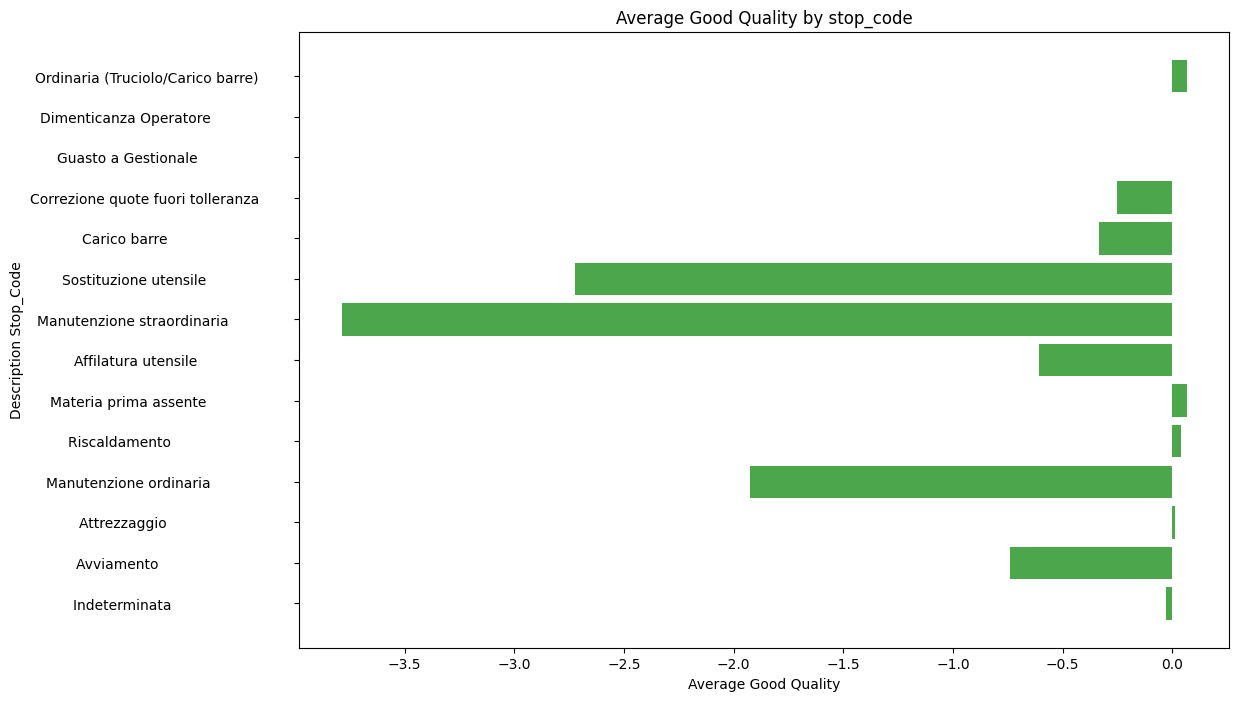

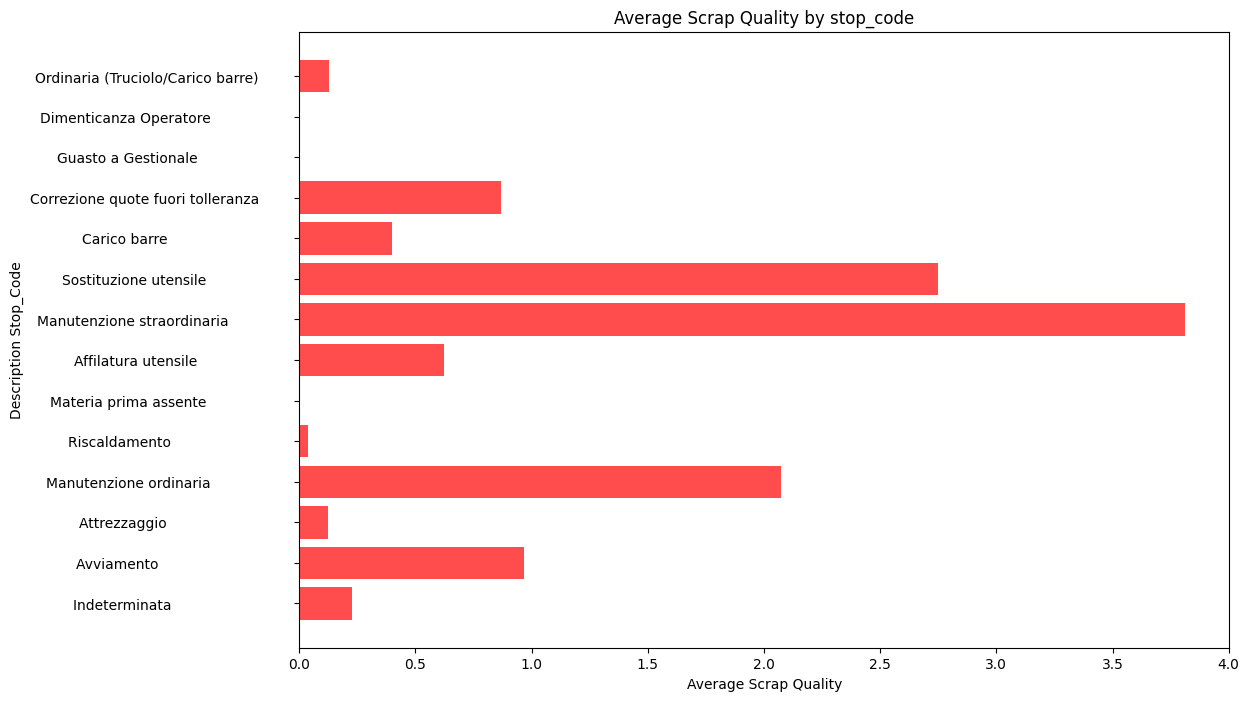

In [35]:
pd.set_option('display.max_colwidth',1000)

# Grouping the merged dataframe by STOP_CODE and calculating the average of quality
energy_value_stats = energy_fermate_merged.groupby('STOP_CODE').agg({
    'STOP_CODE': 'count',
    'DESFERM': 'first',
    'QTY_GOOD': 'mean',
    'QTY_SCRAP': 'mean'
}).rename(columns={'STOP_CODE': 'Entries Count','DESFERM':'Description Stop_Code', 'QTY_GOOD': 'Avg Good Quality', 'QTY_SCRAP': 'Avg Scrap Quality'})

pd.set_option('display.expand_frame_repr', False)

print(energy_value_stats)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', True)

# Create chart for 'Avg Good Quality'
plt.figure(figsize=(12, 8))
#plt.bar(energy_value_stats['Desc'], energy_value_stats['Avg Good Quality'], color='green', alpha=0.7) decidere come mostrare il grafico
plt.barh(energy_value_stats['Description Stop_Code'], energy_value_stats['Avg Good Quality'], color='green', alpha=0.7)

plt.xlabel('Average Good Quality')
plt.ylabel('Description Stop_Code')
plt.title('Average Good Quality by stop_code')
#plt.xticks(rotation=45, ha='right') decidere come mostrare il grafico

plt.show()

# Create chart for 'Avg Scrap Quality'
plt.figure(figsize=(12, 8))
#plt.bar(energy_value_stats['Desc'], energy_value_stats['Avg Scrap Quality'], color='red', alpha=0.7) decidere come mostrare il grafico
plt.barh(energy_value_stats['Description Stop_Code'], energy_value_stats['Avg Scrap Quality'], color='red', alpha=0.7)

plt.xlabel('Average Scrap Quality')
plt.ylabel('Description Stop_Code')
plt.title('Average Scrap Quality by stop_code')
#plt.xticks(rotation=45, ha='right') decidere come mostrare il grafico

plt.show()

# Average the quality excluding stop codes 0 and 15
Calculate the average of good quality and scrap quality for any stop code except 0 and 15

                              Description Stop_Code  Entries Count  Avg Good Quality  Avg Scrap Quality
STOP_CODE                                                                                              
1          Avviamento                                         7787         -0.740593           0.966226
2          Attrezzaggio                                       1392          0.010776           0.124282
4          Manutenzione ordinaria                             2316         -1.924870           2.072539
6          Riscaldamento                                       690          0.042029           0.039130
7          Materia prima assente                                15          0.066667           0.000000
8          Affilatura utensile                                 859         -0.607683           0.623981
9          Manutenzione straordinaria                          202         -3.787129           3.811881
10         Sostituzione utensile                              57

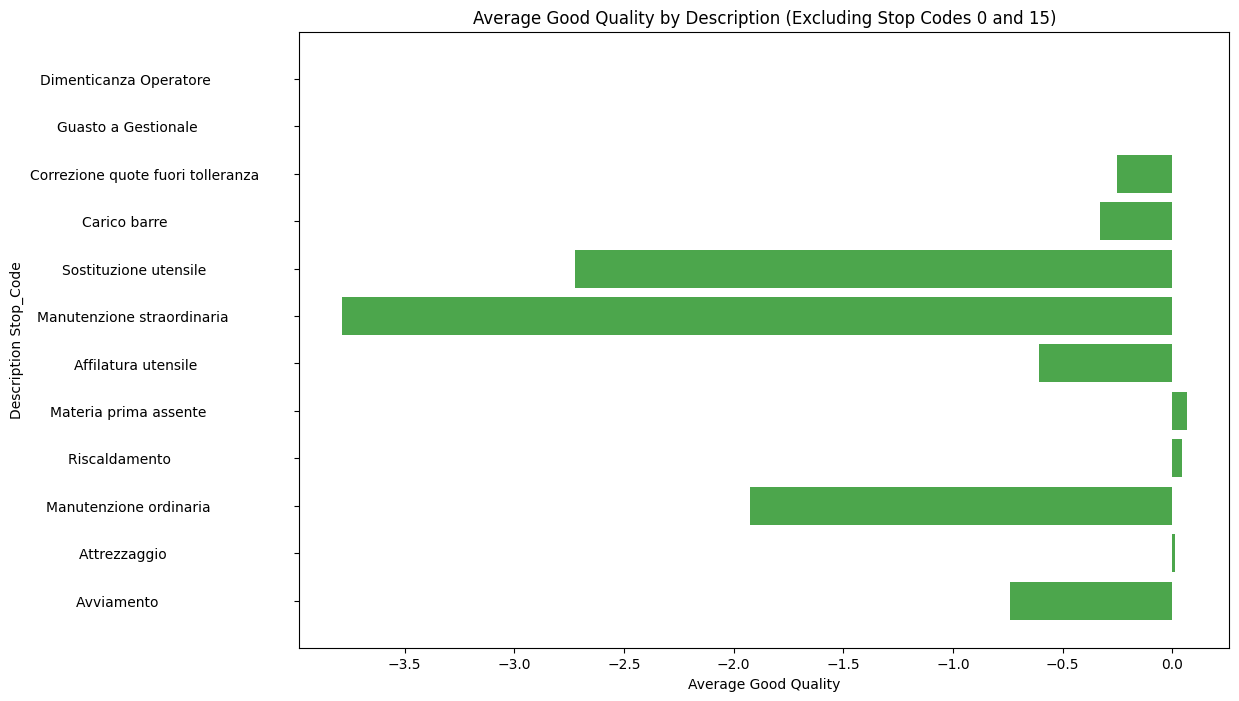

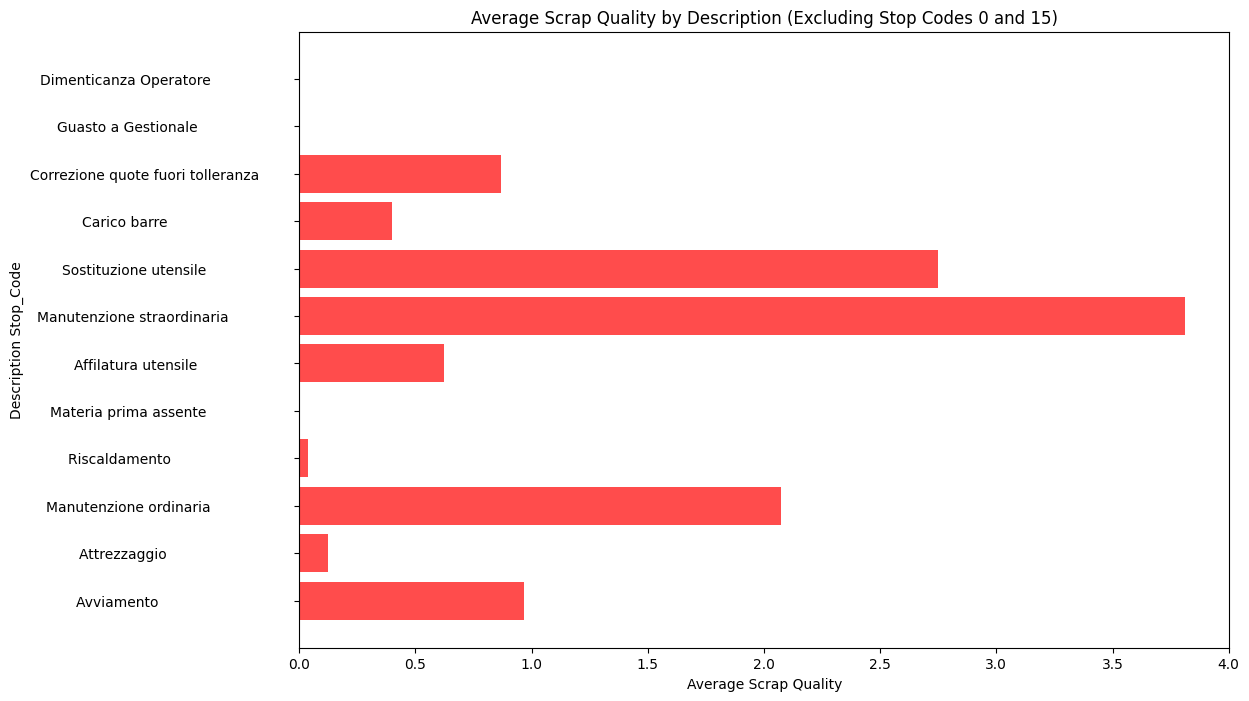

In [49]:
# Filter the data by excluding stop_codes 0 and 15
filtered_data = energy_fermate_merged[(energy_fermate_merged['STOP_CODE'] != 0) & (energy_fermate_merged['STOP_CODE'] != 15)]

pd.set_option('display.max_colwidth',1000)

# Performs aggregation on the filtered data
energy_value_stats_filtered = filtered_data.groupby('STOP_CODE').agg({
    'DESFERM': 'first',
    'STOP_CODE': 'count',
    'QTY_GOOD': 'mean',
    'QTY_SCRAP': 'mean'
}).rename(columns={'STOP_CODE': 'Entries Count', 'DESFERM': 'Description Stop_Code', 'QTY_GOOD': 'Avg Good Quality', 'QTY_SCRAP': 'Avg Scrap Quality'})

pd.set_option('display.expand_frame_repr', False)

print(energy_value_stats_filtered)

print("\n\n")

mask_not_null = filtered_data['Energy_Value'].notna()

# Grouping the merged dataframe by STOP_CODE and calculating the mean of energy values based on the number of non null entries
energy_value = filtered_data[mask_not_null].groupby('STOP_CODE').agg({
     'DESFERM': 'first',
    'STOP_CODE': 'count',
    'Energy_Value': 'mean'
}).rename(columns={'STOP_CODE': 'Entries Count','DESFERM':'Description Stop_Code','Energy_Value': 'Mean Energy Level'})

print(energy_value)

print("\n")
print("-------------------------- Average excluding a percentage of stop code 0 and 15 --------------------------")
print("\n")
# do not completely bypass stop codes 0 and 15
# percentage of rows to include
percentage_to_include = 20

# Filters the DataFrame by including only the specified percentage of rows with STOP_CODE 0 and 15
included_data = energy_fermate_merged[(energy_fermate_merged['STOP_CODE'] == 0) | (energy_fermate_merged['STOP_CODE'] == 15)].sample(frac=percentage_to_include/100)

# Merges included lines with lines with STOP CODEs other than 0 and 15
filtered_data_1 = pd.concat([included_data, energy_fermate_merged[energy_fermate_merged['STOP_CODE'].isin([0, 15]) == False]])

# Perform aggregation on the filtered data, also considering the 'resource' column
energy_value_stats_filtered_1 = filtered_data_1.groupby('STOP_CODE').agg({
    'DESFERM': 'first',
    'STOP_CODE': 'count',
    'QTY_GOOD': 'mean',
    'QTY_SCRAP': 'mean',
}).rename(columns={'STOP_CODE': 'Entries Count','DESFERM':'Description Stop_Code','QTY_GOOD': 'Avg Qty_Good', 'QTY_SCRAP': 'Avg Qty_Scarp'})

pd.set_option('display.expand_frame_repr', False)

print(energy_value_stats_filtered_1)

print("\n\n")

mask_not_null = filtered_data_1['Energy_Value'].notna()

# Grouping the merged dataframe by STOP_CODE and calculating the mean of energy values based on the number of non null entries
energy_value_1 = filtered_data_1[mask_not_null].groupby('STOP_CODE').agg({
     'DESFERM': 'first',
    'STOP_CODE': 'count',
    'Energy_Value': 'mean'
}).rename(columns={'STOP_CODE': 'Entries Count','DESFERM':'Description Stop_Code','Energy_Value': 'Mean Energy Level'})

print(energy_value_1)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', True)

# Create a chart for 'Avg Good Quality'
plt.figure(figsize=(12, 8))
#plt.bar(energy_value_stats_filtered['Description Stop_Code'], energy_value_stats_filtered['Avg Good Quality'], color='green', alpha=0.7, width=0.8)
plt.barh(energy_value_stats_filtered['Description Stop_Code'], energy_value_stats_filtered['Avg Good Quality'], color='green', alpha=0.7)

plt.xlabel('Average Good Quality')
plt.ylabel('Description Stop_Code')
plt.title('Average Good Quality by Description (Excluding Stop Codes 0 and 15)')

plt.show()

# Create a chart for 'Avg Scrap Quality'
plt.figure(figsize=(12, 8))
#plt.bar(energy_value_stats_filtered['Description Stop_Code'], energy_value_stats_filtered['Avg Scrap Quality'], color='red', alpha=0.7, width=0.8)
plt.barh(energy_value_stats_filtered['Description Stop_Code'], energy_value_stats_filtered['Avg Scrap Quality'], color='red', alpha=0.7)

plt.xlabel('Average Scrap Quality')
plt.ylabel('Description Stop_Code')
plt.title('Average Scrap Quality by Description (Excluding Stop Codes 0 and 15)')

plt.show()

# Average for any stop code grouped for each machine
Calculate the average of good quality and scrap quality for any stop code grouped for each machine

                                       Description Stop_Code  Entries Count  Avg Qty_Good  Avg Qty_Scarp
RESOURCE STOP_CODE                                                                                      
108      1          Avviamento                                          332    -13.834337      15.060241
         2          Attrezzaggio                                         43      0.093023       0.000000
         4          Manutenzione ordinaria                              211     -3.208531       3.246445
         6          Riscaldamento                                        34      0.235294       0.000000
         7          Materia prima assente                                 2      0.000000       0.000000
...                                                      ...            ...           ...            ...
618      8          Affilatura utensile                                  75     -0.226667       0.240000
         9          Manutenzione straordinaria         

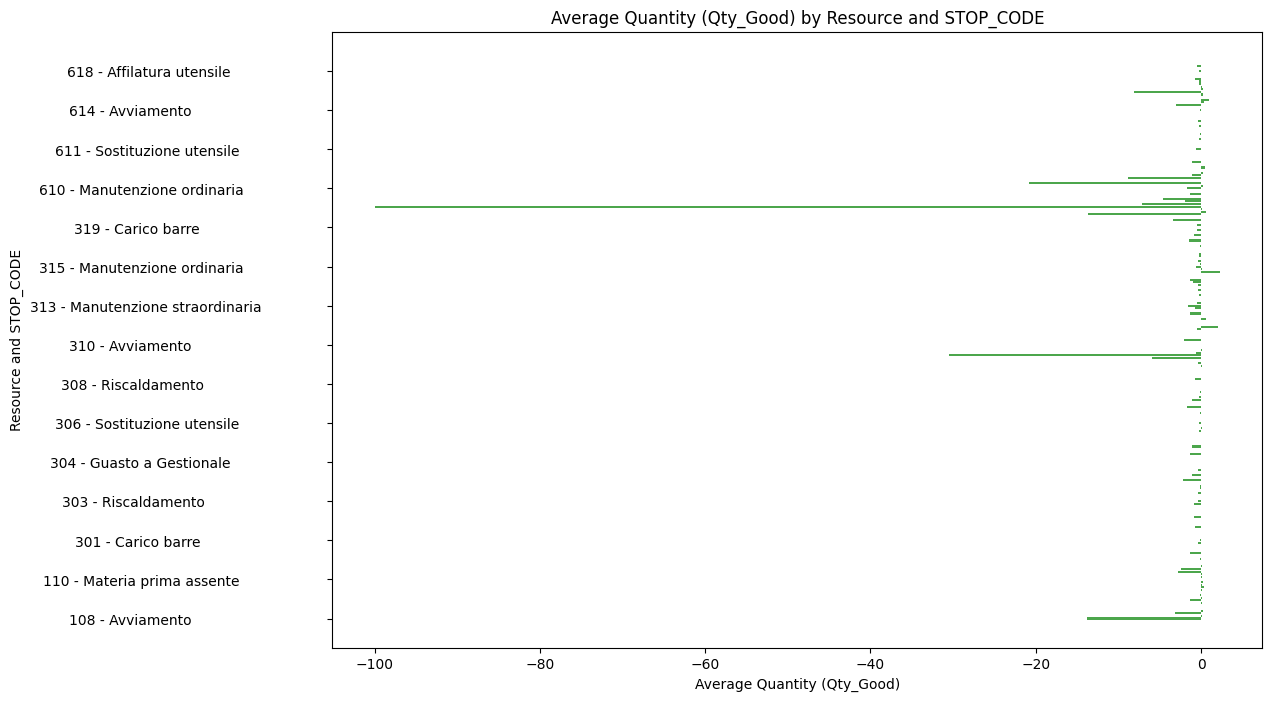

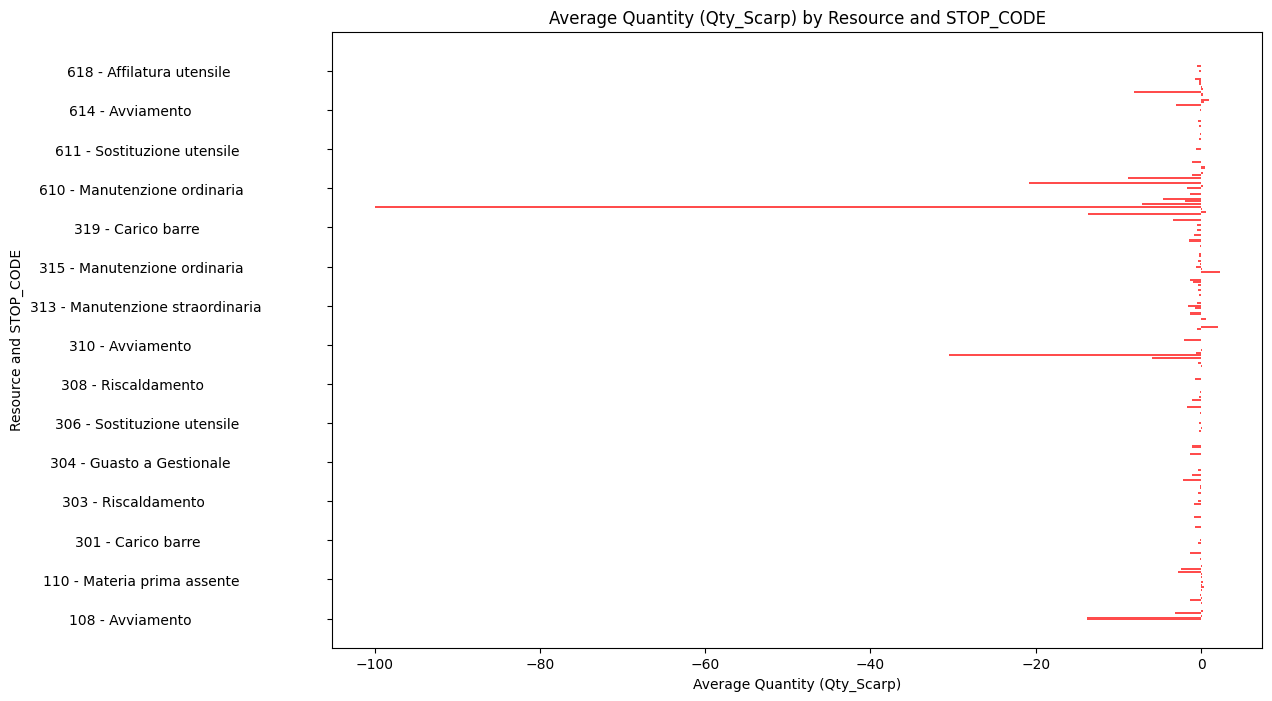

In [50]:
pd.set_option('display.max_colwidth',1000)

# Perform the aggregation also considering the 'resource' column
energy_value_stats = filtered_data.groupby(['RESOURCE', 'STOP_CODE']).agg({
    'DESFERM': 'first',
    'STOP_CODE': 'count',
    'QTY_GOOD': 'mean',
    'QTY_SCRAP': 'mean'
}).rename(columns={'RESOURCE':'RESOURCE','STOP_CODE': 'Entries Count','DESFERM':'Description Stop_Code','QTY_GOOD': 'Avg Qty_Good', 'QTY_SCRAP': 'Avg Qty_Scarp'})

pd.set_option('display.expand_frame_repr', False)

print(energy_value_stats)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', True)

energy_value_stats_filtered_reset = energy_value_stats.reset_index()

# Convert the 'RESOURCE' column to string format
energy_value_stats_filtered_reset['RESOURCE'] = energy_value_stats_filtered_reset['RESOURCE'].astype(str)

# Create a graph for 'Avg Qty_Good' for each 'STOP_CODE' of each resource
plt.figure(figsize=(12, 8))
plt.barh(energy_value_stats_filtered_reset['RESOURCE'] + ' - ' + energy_value_stats_filtered_reset['Description Stop_Code'],
        energy_value_stats_filtered_reset['Avg Qty_Good'], color='green', alpha=0.7, label='Avg Qty_Good')

plt.xlabel('Average Quantity (Qty_Good)')
plt.ylabel('Resource and STOP_CODE')
plt.title('Average Quantity (Qty_Good) by Resource and STOP_CODE')

tick_positions = range(0, len(energy_value_stats_filtered_reset), 15)
plt.yticks(tick_positions, energy_value_stats_filtered_reset['RESOURCE'][tick_positions] + ' - ' +
           energy_value_stats_filtered_reset['Description Stop_Code'][tick_positions])

plt.show()

# Create a graph for 'Avg Qty_Scrap' for each 'STOP_CODE' of each resource
plt.figure(figsize=(12, 8))
plt.barh(energy_value_stats_filtered_reset['RESOURCE'] + ' - ' + energy_value_stats_filtered_reset['Description Stop_Code'],
        energy_value_stats_filtered_reset['Avg Qty_Good'], color='red', alpha=0.7, label='Avg Qty_Scarp')

plt.xlabel('Average Quantity (Qty_Scarp)')
plt.ylabel('Resource and STOP_CODE')
plt.title('Average Quantity (Qty_Scarp) by Resource and STOP_CODE')
tick_positions = range(0, len(energy_value_stats_filtered_reset), 15)
plt.yticks(tick_positions, energy_value_stats_filtered_reset['RESOURCE'][tick_positions] + ' - ' +
           energy_value_stats_filtered_reset['Description Stop_Code'][tick_positions])

plt.show()

# Average for any stop code except 0 and 15 grouped for each machine
Calculate the average of good quality and scrap quality for any stop code except 0 and 15 grouped for each machine

                                       Description Stop_Code  Entries Count  Avg Qty_Good  Avg Qty_Scarp
RESOURCE STOP_CODE                                                                                      
108      1          Avviamento                                          332    -13.834337      15.060241
         2          Attrezzaggio                                         43      0.093023       0.000000
         4          Manutenzione ordinaria                              211     -3.208531       3.246445
         6          Riscaldamento                                        34      0.235294       0.000000
         7          Materia prima assente                                 2      0.000000       0.000000
...                                                      ...            ...           ...            ...
618      8          Affilatura utensile                                  75     -0.226667       0.240000
         9          Manutenzione straordinaria         

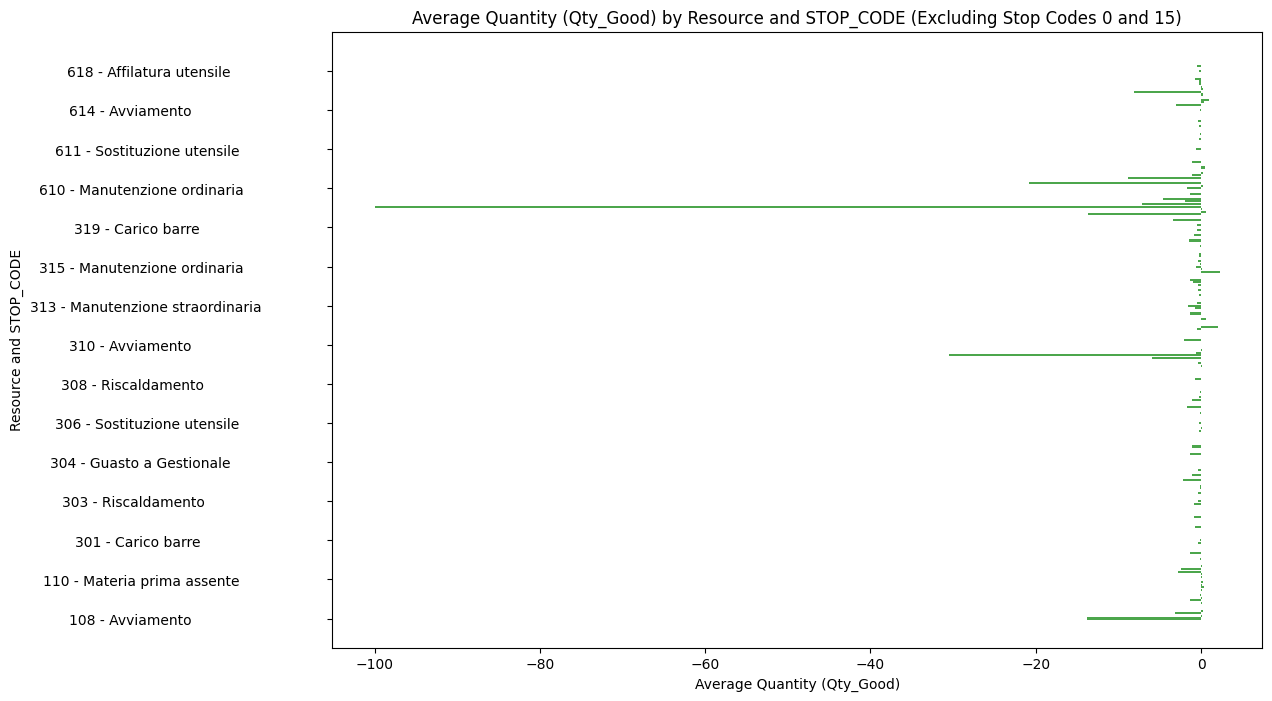

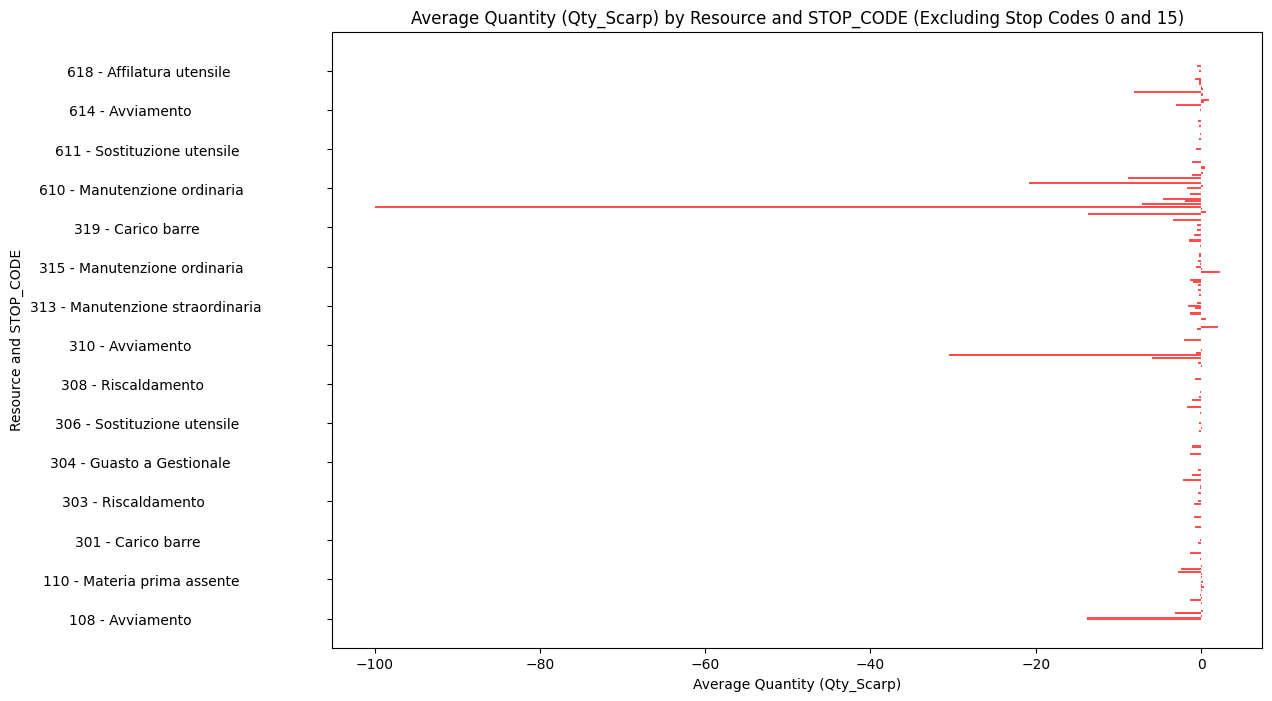

In [52]:
# Filter the data by excluding stop_codes 0 and 15
filtered_data = energy_fermate_merged[(energy_fermate_merged['STOP_CODE'] != 0) & (energy_fermate_merged['STOP_CODE'] != 15)]

pd.set_option('display.max_colwidth',1000)

# Perform aggregation on the filtered data, also considering the 'resource' column
energy_value_stats_filtered = filtered_data.groupby(['RESOURCE', 'STOP_CODE']).agg({
    'DESFERM': 'first',
    'STOP_CODE': 'count',
    'QTY_GOOD': 'mean',
    'QTY_SCRAP': 'mean',
}).rename(columns={'RESOURCE':'RESOURCE','STOP_CODE': 'Entries Count','DESFERM':'Description Stop_Code','QTY_GOOD': 'Avg Qty_Good', 'QTY_SCRAP': 'Avg Qty_Scarp'})

pd.set_option('display.expand_frame_repr', False)

print(energy_value_stats_filtered)

print("\n\n")

mask_not_null = filtered_data['Energy_Value'].notna()

# Grouping the merged dataframe by STOP_CODE and calculating the mean of energy values based on the number of non null entries
energy_value = filtered_data[mask_not_null].groupby(['RESOURCE', 'STOP_CODE']).agg({
     'DESFERM': 'first',
    'STOP_CODE': 'count',
    'Energy_Value': 'mean'
}).rename(columns={'RESOURCE':'RESOURCE','STOP_CODE': 'Entries Count','DESFERM':'Description Stop_Code','Energy_Value': 'Mean Energy Level'})

print(energy_value)

print("\n")
print("-------------------------- Average excluding a percentage of stop code 0 and 15 --------------------------")
print("\n")
# do not completely bypass stop codes 0 and 15
# percentage of rows to include
percentage_to_include = 20

# Filters the DataFrame by including only the specified percentage of rows with STOP_CODE 0 and 15
included_data = energy_fermate_merged[(energy_fermate_merged['STOP_CODE'] == 0) | (energy_fermate_merged['STOP_CODE'] == 15)].sample(frac=percentage_to_include/100)

# Merges included lines with lines with STOP CODEs other than 0 and 15
filtered_data_1 = pd.concat([included_data, energy_fermate_merged[energy_fermate_merged['STOP_CODE'].isin([0, 15]) == False]])

# Perform aggregation on the filtered data, also considering the 'resource' column
energy_value_stats_filtered_1 = filtered_data_1.groupby(['RESOURCE', 'STOP_CODE']).agg({
    'DESFERM': 'first',
    'STOP_CODE': 'count',
    'QTY_GOOD': 'mean',
    'QTY_SCRAP': 'mean',
}).rename(columns={'RESOURCE':'RESOURCE','STOP_CODE': 'Entries Count','DESFERM':'Description Stop_Code','QTY_GOOD': 'Avg Qty_Good', 'QTY_SCRAP': 'Avg Qty_Scarp'})

pd.set_option('display.expand_frame_repr', False)

print(energy_value_stats_filtered_1)

print("\n\n")

mask_not_null = filtered_data_1['Energy_Value'].notna()

# Grouping the merged dataframe by STOP_CODE and calculating the mean of energy values based on the number of non null entries
energy_value_1 = filtered_data_1[mask_not_null].groupby(['RESOURCE', 'STOP_CODE']).agg({
     'DESFERM': 'first',
    'STOP_CODE': 'count',
    'Energy_Value': 'mean'
}).rename(columns={'RESOURCE':'RESOURCE','STOP_CODE': 'Entries Count','DESFERM':'Description Stop_Code','Energy_Value': 'Mean Energy Level'})

print(energy_value_1)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', True)

energy_value_stats_filtered_reset = energy_value_stats_filtered.reset_index()
# Convert the 'RESOURCE' column to string format
energy_value_stats_filtered_reset['RESOURCE'] = energy_value_stats_filtered_reset['RESOURCE'].astype(str)

# Create a graph for 'Avg Qty_Good' for each 'STOP_CODE' of each resource
plt.figure(figsize=(12, 8))
plt.barh(energy_value_stats_filtered_reset['RESOURCE'] + ' - ' + energy_value_stats_filtered_reset['Description Stop_Code'],
        energy_value_stats_filtered_reset['Avg Qty_Good'], color='green', alpha=0.7, label='Avg Qty_Good')

plt.xlabel('Average Quantity (Qty_Good)')
plt.ylabel('Resource and STOP_CODE')
plt.title('Average Quantity (Qty_Good) by Resource and STOP_CODE (Excluding Stop Codes 0 and 15)')

tick_positions = range(0, len(energy_value_stats_filtered_reset), 15)
plt.yticks(tick_positions, energy_value_stats_filtered_reset['RESOURCE'][tick_positions] + ' - ' +
           energy_value_stats_filtered_reset['Description Stop_Code'][tick_positions])

plt.show()

# Create a graph for 'Avg Qty_Scarp' for each 'STOP_CODE' of each resource
plt.figure(figsize=(12, 8))
plt.barh(energy_value_stats_filtered_reset['RESOURCE'] + ' - ' + energy_value_stats_filtered_reset['Description Stop_Code'],
        energy_value_stats_filtered_reset['Avg Qty_Good'], color='red', alpha=0.7, label='Avg Qty_Scarp')

plt.xlabel('Average Quantity (Qty_Scarp)')
plt.ylabel('Resource and STOP_CODE')
plt.title('Average Quantity (Qty_Scarp) by Resource and STOP_CODE (Excluding Stop Codes 0 and 15)')
tick_positions = range(0, len(energy_value_stats_filtered_reset), 15)
plt.yticks(tick_positions, energy_value_stats_filtered_reset['RESOURCE'][tick_positions] + ' - ' +
           energy_value_stats_filtered_reset['Description Stop_Code'][tick_positions])

plt.show()
